#Assignment -5 :

In [1]:
#https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


###Loading Keras and Model related packages

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


from keras.datasets import mnist

###Loading preshuffled MNIST Dataset in Train and Test

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


###Visualization of MNIST Dataset which has sample of 60k images size of 28x28

(60000, 28, 28)


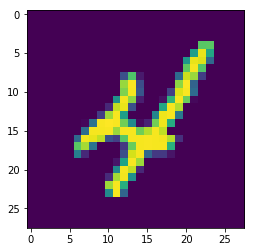

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[9])

###Preprocess input data for Keras.
>***A full-color image with all 3 RGB channels will have a depth of 3.Our MNIST images only have a depth of 1, but we must explicitly declare that.***

>***In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height)***.

In [0]:
#Converting/Reshaping 2-D dimenional Grayscale image to keras specific 4-D input/output form
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###Let's look at shape of our class label data

In [6]:
print(y_train.shape)

(60000,)


###We should have 10 different classes, one for each digit, one, but it's looks like we have 1D array.
###Let's take a look at labels of first 10 traning samples.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

>***1. We can fix this easily:***

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
print('Train min=%.3f, max=%.3f' % (X_train.min(), X_train.max()))
print('Test min=%.3f, max=%.3f' % (X_test.min(), X_test.max()))

Train min=0.000, max=255.000
Test min=0.000, max=255.000


###Now have a look, we have 10 different classes for individual for each digit.

In [10]:
print (Y_train.shape)

(60000, 10)


In [11]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Image Normalization
>***1. Image standarization technique*** : Standardization is a data scaling technique that assumes that the distribution of the data is Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation of one.

>***2. Standarization with Mean of pixel*** : Standardization of images is achieved by subtracting the mean pixel value and dividing the result by the standard deviation of the pixel values.

In [12]:
# create generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate mean on training dataset
datagen.fit(X_train)

# prepare an iterators to scale images
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=-0.424, max=2.822


##Define Model Architechture :

 >***BatchNormalization*** : Helps to normalize features, weights and initialization of network.
 
 >***Kernal Regularization (L2)*** : penalization of weights in convolution layers which helps to reduce loss and Learning rate, overall model perform better with reduced loss.

In [22]:
#Importing core Functions of Keras layers which will use in Neural Network
from keras.layers import Activation, BatchNormalization

#Now Will start with Sequential Model
model = Sequential()

#Adding Input Layer:
#Input Image size 28x28x1
#convolution filter/kernal size is 3x3x1 of count/row : 10
#Adding L2 Regularizers to penalize weights to 10% in layer wise.
model.add(Convolution2D(10, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(28,28,1))) # 26
#BatchNorms will normalize weights using Mean, Variance of each channels pixel-wise in particular layer
model.add(BatchNormalization())
#adding Dropouts(10% drops in pixel values randomly) which drops random nueron/pixel in particular layer which helps model to learn other params exceplicitly
model.add(Dropout(0.1))

#Input image to these layer is 26x26x10
#Kernal/filter size : 3x3x10 of number/count/row : 16
#Adding L2 Regularizers to penalize weights to 10% in layer wise.
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 24x24x10
#Kernal/filter size : 1x1x16 of number/count/row : 10
#1x1 convolution layer which helps to reduce channel size and increase particular features amplitude.
model.add(Convolution2D(10, 1, 1, kernel_regularizer=regularizers.l2(0.01), activation='relu')) # 24

#MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling,
#filter across the previous layer and taking the max of the 4 values in the 2x2 filter.
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
#model.add(Convolution2D(10, 1, 1, activation='relu')) # 12

#Input image to these layer is 12x12x10
#Kernal/filter size : 3x3x10 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 10x10x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 8x8x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 6x6x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01), activation='relu')) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1))

#model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4, 4))

#Before prediction layer we should flatten all convolution weights of neuron
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg..., activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Co

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        170       
__________

###Model Compilation:
>***1. we have LR scheduler*** : It changes or reduce LR with epochs increases 

>***2. we have callbacks*** : It will use to save best model as per epochs with reduced validation loss.

>***3. fit_Generator*** : It has Train and test iterator which helps to scale images, how epochs will go step by step and validation steps on validation data.

In [25]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.300 * epoch), 10)

# load weights
#model.load_weights("weights.best.hdf5")

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

#model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test,Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

checkpoint=ModelCheckpoint(filepath="weights.best.model.hdf5",
                           monitor='val_loss',
                           verbose=0, save_best_only=True,
                           save_weights_only=False,
                           mode='max', period=1)

# fit model with generator
model.fit_generator(train_iterator,
                    steps_per_epoch=256,
                    epochs=40,
                    callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)],
                    validation_data=test_iterator,
                    validation_steps=512)

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
256/256 [==============================] - 72s 282ms/step - loss: 0.6257 - acc: 0.9366 - val_loss: 0.5282 - val_acc: 0.8950
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0023076923.
256/256 [==============================] - 68s 267ms/step - loss: 0.2853 - acc: 0.9622 - val_loss: 0.4181 - val_acc: 0.9049
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.001875.
256/256 [==============================] - 68s 267ms/step - loss: 0.2081 - acc: 0.9709 - val_loss: 0.2170 - val_acc: 0.9631
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015789474.
256/256 [==============================] - 69s 269ms/step - loss: 0.1744 - acc: 0.9730 - val_loss: 0.2475 - val_acc: 0.9454
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013636364.
256/256 [==============================] - 68s 267ms/step - loss: 0.1686 - acc: 0.971

###Time to evaluate Model with Test Iterator and steps as length of iterator

In [0]:
#score = model.evaluate(X_test, Y_test, verbose=0)
score = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)

###Score to achieve ***99.39*** validation accurarcy

In [27]:
print(score)

[0.05082696515023708, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [32]:
print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 8.9109215e-25 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.3156852e-13 4.5843218e-03 0.0000000e+00 0.0000000e+00
  0.0000000e+00 9.9540210e-01 0.0000000e+00 1.3541966e-05 0.0000000e+00]
 [4.1242116e-36 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.0838800e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.3046669e-14 5.9961622e-09 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.6261773e-03 3.9503586e-33 9.9537379e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9847037e-01
  0.0000000e+00 0.0000000e+00 1.2665432e-18 6.9533463e-23 

In [37]:
import pandas as pd
d={'pred': model.predict_classes(X_test),
   'true': np.argmax(Y_test, axis=1)}
df=pd.DataFrame(data=d)

array1 = np.array(df[(df.pred!=df.true) & (df.true==1)].index)
print(array1)

df2 =df[(df.pred!=df.true)]
df2.shape

[   2    5   39   40   57   89   94  107  135  137  143  176  190  196
  202  204  224  228  276  279  288  302  348  354  377  378  388  393
  416  430  455  476  480  489  506  523  537  615  619  672  682  695
  716  725  745  749  754  767  790  818  824  835  836  840  848  850
  900  907  956  964  967  977 1011 1019 1025 1027 1030 1037 1038 1040
 1054 1097 1129 1136 1139 1189 1211 1214 1240 1257 1280 1295 1305 1316
 1318 1329 1351 1358 1392 1403 1424 1448 1515 1528 1555 1582 1630 1633
 1643 1646 1657 1659 1691 1704 1715 1729 1760 1766 1773 1780 1791 1820
 1830 1836 1838 1868 1884 1885 1897 1900 1909 1922 1945 1988 1993 1994
 2018 2027 2041 2051 2137 2154 2182 2221 2228 2235 2239 2245 2258 2261
 2273 2276 2277 2283 2302 2315 2316 2343 2355 2357 2358 2359 2366 2379
 2398 2409 2411 2416 2418 2434 2473 2510 2524 2529 2541 2553 2576 2590
 2599 2626 2655 2661 2676 2693 2704 2705 2706 2719 2725 2734 2746 2753
 2786 2788 2789 2816 2825 2827 2867 2878 2880 2885 2912 2928 2943 2946
 2950 

(2385, 2)